### Fatma Betül Özgün HW2 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 
from sklearn import model_selection
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('train.xls', header= 1) 
df.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.shape

(30000, 25)

In [5]:
#Deciding whether our data has missing value or not 
df.isnull().values.any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [4]:
df.rename(columns={"default payment next month": "def_payment"}, inplace = True)

### Exploratory Data Analysis 

def_payment
0    23364
1     6636
dtype: int64


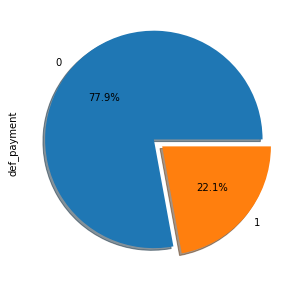

In [8]:
#Clss Distribution
df['def_payment'].value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=True,figsize=(7,5))
print(df.groupby('def_payment').size()) 

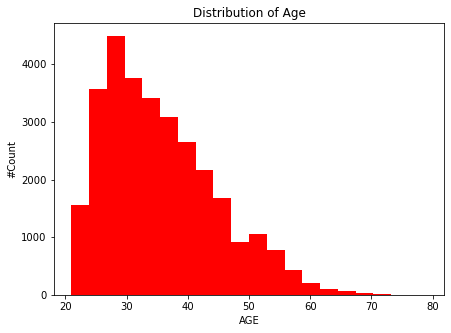

In [138]:
# Distributions of attributes- Histogram (age) 
plt.figure(figsize=(7,5))
plt.hist(df['AGE'], bins=20, color='red')
plt.title('Distribution of Age')
plt.xlabel('AGE') ; 
plt.ylabel('#Count')
plt.show();

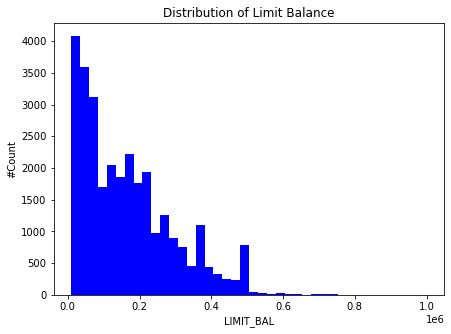

In [126]:
# Distributions of attributes- Histogram (limit balance) 
plt.figure(figsize=(7,5))
plt.hist(df['LIMIT_BAL'], bins=40, color='blue')
plt.title('Distribution of Limit Balance')
plt.xlabel('LIMIT_BAL') ; 
plt.ylabel('#Count')
plt.show();

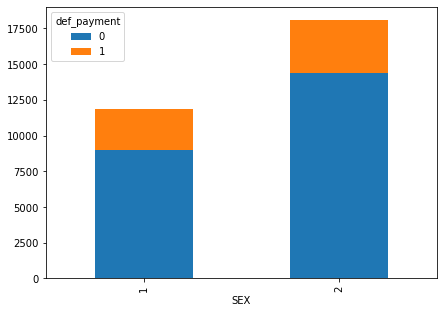

In [60]:
#Relationship between gender and default payment (1 = male; 2 = female) 
Gender = pd.crosstab(index=df['SEX'],columns=df['def_payment'])
Gender.plot(kind='bar', stacked=True, figsize=(7,5));

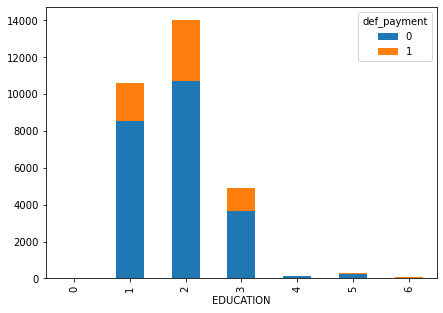

In [52]:
#Relationship betw. education and default payment (1 = graduate school; 2 = university; 3 = high school; 4 = others)
Education = pd.crosstab(index=df['EDUCATION'],columns=df['def_payment'])
Education.plot(kind='bar', stacked=True, figsize=(7,5));

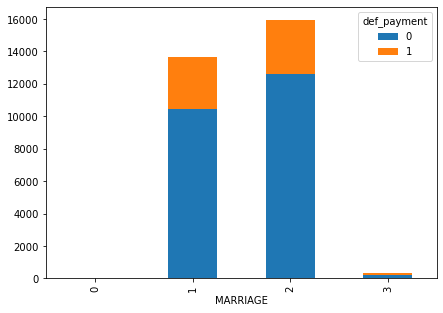

In [54]:
#Relationship betw.marital status and default payment (1 = married; 2 = single; 3 = others)
Education = pd.crosstab(index=df['MARRIAGE'],columns=df['def_payment'])
Education.plot(kind='bar', stacked=True, figsize=(7,5));

<AxesSubplot:xlabel='MARRIAGE', ylabel='AGE'>

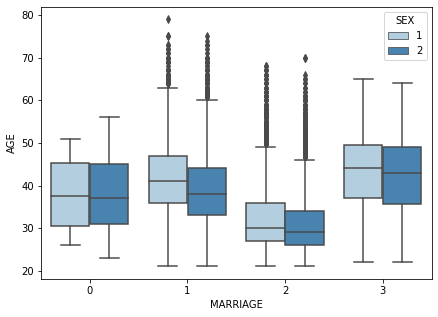

In [123]:
#Relationship between marriage, gender and age 
plt.figure(figsize=(7,5))
sns.boxplot(x='MARRIAGE', y='AGE', hue='SEX', data=df, palette="Blues")

<AxesSubplot:xlabel='EDUCATION', ylabel='AGE'>

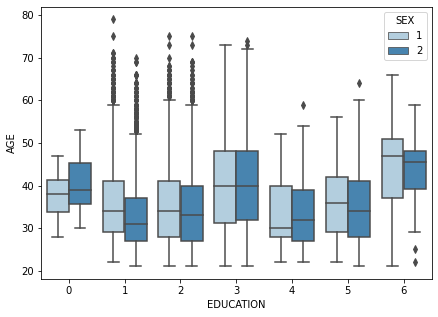

In [124]:
#Relationship between education, age and gender (1 = graduate school; 2 = university; 3 = high school; 4 = others)
plt.figure(figsize=(7,5))
sns.boxplot(x='EDUCATION', y='AGE', hue='SEX', data=df, palette="Blues")

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

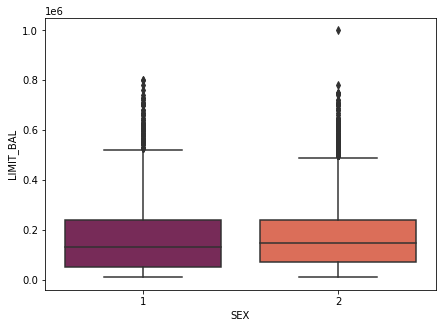

In [135]:
#Relationship between gender and limit balance 
plt.figure(figsize=(7,5))
sns.boxplot(x="SEX", y="LIMIT_BAL", data=df, palette="rocket")

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

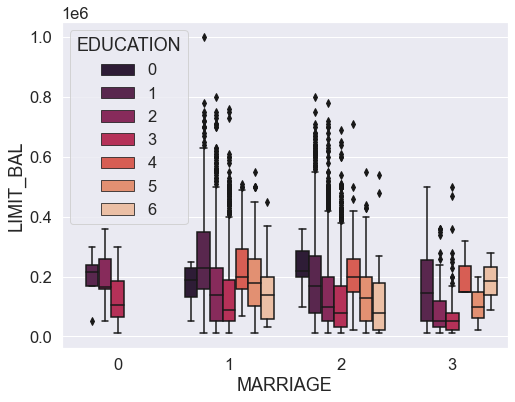

In [153]:
#Relationship between gender and limit balance 
plt.figure(figsize=(8,6))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', hue='EDUCATION', data=df, palette="rocket")

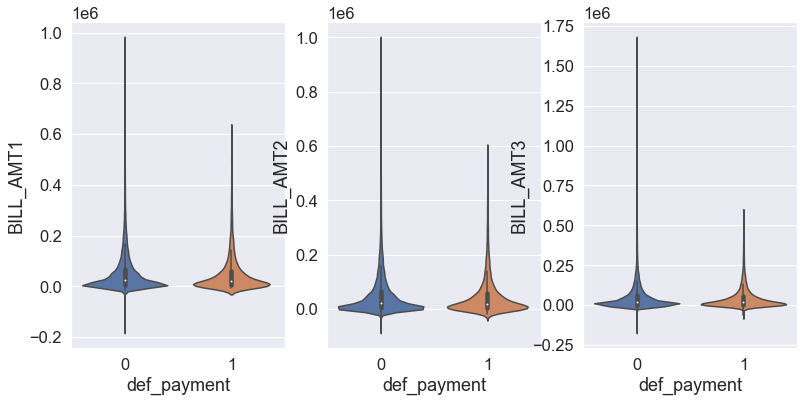

In [167]:
#Creating box plot for BILL_AMT1, BILL_AMT2, BILL_AMT3
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
sns.violinplot(x='def_payment', y='BILL_AMT1', data=df)
plt.subplot(1,3,2)
sns.violinplot(x='def_payment', y='BILL_AMT2', data=df)
plt.subplot(1,3,3)
sns.violinplot(x='def_payment', y='BILL_AMT3', data=df)
plt.show();

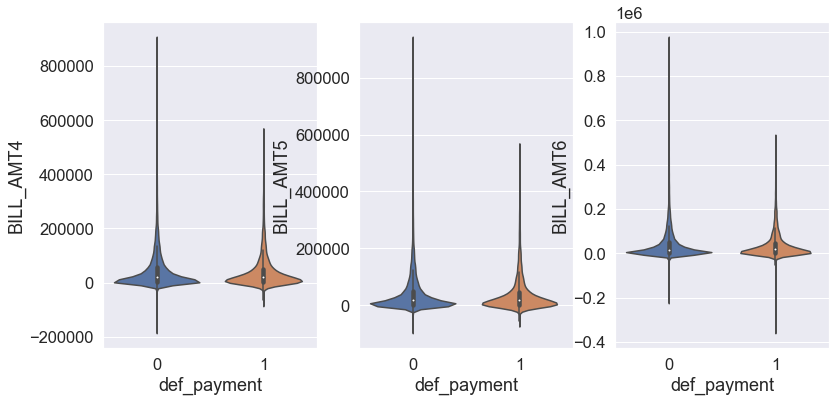

In [168]:
#Creating box plot for BILL_AMT4, BILL_AMT5, BILL_AMT6
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
sns.violinplot(x='def_payment', y='BILL_AMT4', data=df)
plt.subplot(1,3,2)
sns.violinplot(x='def_payment', y='BILL_AMT5', data=df)
plt.subplot(1,3,3)
sns.violinplot(x='def_payment', y='BILL_AMT6', data=df)
plt.show();

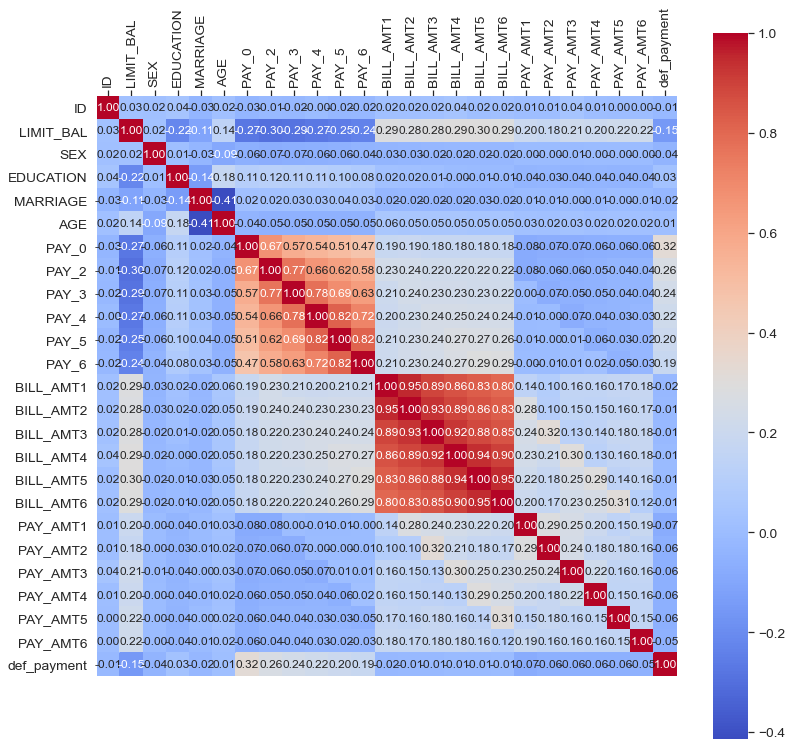

In [139]:
# Correlation table between the features 
sns.set(font_scale = 1.25)
correlation_matrix = df.corr()
plt.figure(figsize=(13,13))
ax = sns.heatmap(correlation_matrix, vmax=1, cbar=True, square=True, annot=True, fmt='.2f', 
                 annot_kws={'size': 12}, cmap='coolwarm')
ax.xaxis.set_ticks_position('top')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

***A few conclusions I can draw by observing the plots above:***

There are 30.000 credit card customers. While 23.364 (77.9%) customers make their payments, only 6.636 (21.1%) customers has default payments. Thus, we have unbalanced dataset.

Distribution of age and limit balance is right-skewed. Average age is 35.4 years and its' standard deviation is 9.2.

Customers are generally graduated from universities, graduate schools and high schools.

Most of the customers are either single or married. 

### Train-Test Split 

In [5]:
df.drop(["ID"],axis=1,inplace=True) 

In [6]:
X=df.drop("def_payment",axis=1)
y=df["def_payment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Building the Model with Logistic Regression

In [189]:
pipe = Pipeline([ ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1, scoring='f1')

grid.fit(X_train, y_train)
y_pred=grid.predict(X_test)

print('Best parameters  :', grid.best_params_)
print('\nTraining accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', grid.score(X_test, y_test))
print('f1 score    :', f1_score(y_test, y_pred, average=None))

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:  8.2min finished


Best parameters  : {'clf__C': 0.6500000000000001, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}

Training accuracy: 0.3679229619790802
Test accuracy    : 0.35148173673328736
f1 score    : [0.88862587 0.35148174]


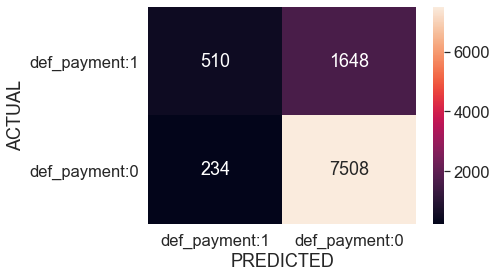


               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7742
           1       0.69      0.24      0.35      2158

    accuracy                           0.81      9900
   macro avg       0.75      0.60      0.62      9900
weighted avg       0.79      0.81      0.77      9900



In [190]:
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["def_payment:1", "def_payment:0"] , 
                yticklabels = ["def_payment:1", "def_payment:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

***In my first logistic regression model, I use all features without any changing. While building second logistic model as below, I try to change some features such as sex, education and marriage based on exploratory data analysis results. However, my f1 score decrease in second model. Therefore, I use all features without making any change in all models.***

In [220]:
df2 = df.copy()

In [222]:
df2['SEX']= df2['SEX'].map({2:0,1:1}) 
df2['EDUCATION']= df2['EDUCATION'].map({1:2,2:2,3:1,4:0,5:0,6:0,0:0}) 
df2['MARRIAGE']= df2['MARRIAGE'].map({1:1,2:1,3:0,4:0,0:0})

In [224]:
X=df2.drop("def_payment",axis=1)
y=df2["def_payment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [225]:
pipe = Pipeline([ ('scaler',  StandardScaler()),
                 ('clf',     LogisticRegression(random_state=42))])

params = [{'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga']},
          
          {'clf__C'           : np.arange(0.1, 2.0, 0.05), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}]

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
grid = GridSearchCV(pipe, param_grid=params, cv=skf, n_jobs=-1, verbose=1, scoring='f1')

grid.fit(X_train, y_train)
y_pred=grid.predict(X_test)

print('Best parameters  :', grid.best_params_)
print('\nTraining accuracy:', grid.score(X_train, y_train))
print('Test accuracy    :', grid.score(X_test, y_test))
print('f1 score    :', f1_score(y_test, y_pred, average=None))

Fitting 5 folds for each of 266 candidates, totalling 1330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1330 out of 1330 | elapsed:  8.1min finished


Best parameters  : {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}

Training accuracy: 0.36363636363636365
Test accuracy    : 0.3485162180814355
f1 score    : [0.88829724 0.34851622]


### Building the Model with Default Parameters

***Initially, I try to build my models with their default parameters. GradientBoosting, XGBoost and Random Forest give the highest f-1 score. Thus, I also build them by tuning their hyperparameters.***  

In [237]:
trees = DecisionTreeClassifier(random_state=42)
models = [
    ['AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=42)], 
    ['GradientBoosting', GradientBoostingClassifier(random_state=42)],
    ['XGBoost', XGBClassifier(seed=42)],
    ['DecisionTree', DecisionTreeClassifier(random_state=42)], 
    ['RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)], 
    ['ExtraTrees', ExtraTreesClassifier(n_estimators=100, random_state=42)],
    ['BaggingClassifier', BaggingClassifier(base_estimator=trees, n_estimators=100, random_state=42)],
    ]
# Use the following classifiers with their defaults
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print( "Cls:" + abbrv + str(f1_score(y_test, y_pred, average=None)))

Cls:AdaBoost[0.89115236 0.43703242]
Cls:GradientBoosting[0.89278989 0.47108181]
[23:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cls:XGBoost[0.8878019  0.46734398]
Cls:DecisionTree[0.82130472 0.39539517]
Cls:RandomForest[0.88985171 0.47113976]
Cls:ExtraTrees[0.88554659 0.45644599]
Cls:BaggingClassifier[0.88822343 0.46784987]


### Building the Model with Random Forest 

#### a- Hyperparameter Selection 

#### 1- Number of Trees

num-of-trees  CV-mean-score  Train-score
  10          0.428          0.423
  50          0.469          0.461
 100          0.478          0.471
 150          0.479          0.471
 250          0.479          0.473
 350          0.479          0.469
 400          0.480          0.468


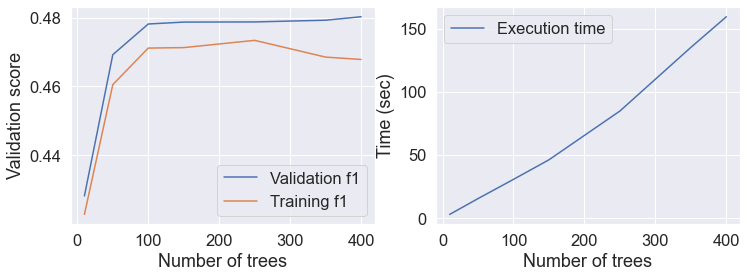

In [244]:
import time
clf = RandomForestClassifier(random_state=42)
n_estimators = [10, 50, 100, 150, 250, 350, 400]
cv_scores = [] ; train_scores = [] ; exectime = []
print('num-of-trees  CV-mean-score  Train-score')

for i in n_estimators:
    clf.set_params(n_estimators = i)
    start = time.time()
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1')
    cv_scores.append(scores.mean())
    clf.fit(X_train, y_train)
    end = time.time()
    f1 = f1_score(y_test, clf.predict(X_test), average=None)
    train_scores.append(f1[1])
    exectime.append(end-start)
    print('%4d          %5.3f          %5.3f' %(i, scores.mean(), f1[1] ))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(n_estimators, cv_scores, label='Validation f1')
plt.plot(n_estimators, train_scores, label='Training f1')
plt.xlabel('Number of trees')
plt.ylabel('Validation score')
plt.legend() 
plt.subplot(122)
plt.plot(n_estimators, exectime, label='Execution time')
plt.xlabel('Number of trees')
plt.ylabel('Time (sec)')
plt.legend()
plt.show()

#### 2- Maximum Features  

In [260]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

param_grid = {'max_features': [0.6,0.7,0.8,0.9]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_search = GridSearchCV(model, param_grid,n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_search.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print('Training f1 score:', grid_search.score(X_train, y_train))
print('Test f1 score    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.5min finished



Best CV score: 0.477224 using {'max_features': 0.7}

0.475327 (0.008131) with: {'max_features': 0.6}
0.477224 (0.005210) with: {'max_features': 0.7}
0.475134 (0.002464) with: {'max_features': 0.8}
0.475910 (0.005297) with: {'max_features': 0.9}
Training f1 score: 0.9986595174262735
Test f1 score    : 0.4613583138173302


#### 3- Maximum Depth  

In [263]:
model = RandomForestClassifier(n_estimators=100, max_features=0.7, random_state=42)

param_grid = {'max_depth': [6,7,8,9,10]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold,verbose=1,scoring="f1")

grid_search.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_search.score(X_train, y_train))
print('Test f1 score    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished



Best CV score: 0.474060 using {'max_depth': 9}

0.471571 (0.009687) with: {'max_depth': 6}
0.469325 (0.010338) with: {'max_depth': 7}
0.472793 (0.009104) with: {'max_depth': 8}
0.474060 (0.007970) with: {'max_depth': 9}
0.468654 (0.010584) with: {'max_depth': 10}
Training f1 score: 0.5767241379310346
Test f1 score    : 0.4725738396624473


#### 4- Minimum Sample Split

In [266]:
model = RandomForestClassifier(n_estimators=100, max_features=0.7, max_depth=9,random_state=42)

param_grid = {'min_samples_split': [1,2,3,4]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_search.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_search.score(X_train, y_train))
print('Test f1 score    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished



Best CV score: 0.474060 using {'min_samples_split': 2}

nan (nan) with: {'min_samples_split': 1}
0.474060 (0.007970) with: {'min_samples_split': 2}
0.473555 (0.009927) with: {'min_samples_split': 3}
0.472798 (0.007094) with: {'min_samples_split': 4}
Training f1 score: 0.5767241379310346
Test f1 score    : 0.4725738396624473


#### 5- Minimum Sample Leaf

In [269]:
model = RandomForestClassifier(n_estimators=100, max_features=0.7, max_depth=9, min_samples_split= 2, random_state=42)

param_grid = {'min_samples_leaf': [1,2,3,4,5,6]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_search.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1:', grid_search.score(X_train, y_train))
print('Test f1    :', grid_search.score(X_test, y_test))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished



Best CV score: 0.474188 using {'min_samples_leaf': 5}

0.474060 (0.007970) with: {'min_samples_leaf': 1}
0.474151 (0.009108) with: {'min_samples_leaf': 2}
0.472495 (0.010058) with: {'min_samples_leaf': 3}
0.471033 (0.010915) with: {'min_samples_leaf': 4}
0.474188 (0.012103) with: {'min_samples_leaf': 5}
0.473823 (0.013505) with: {'min_samples_leaf': 6}
Training f1: 0.5585559566787004
Test f1    : 0.47186277460126397


#### b- Building the Model  

In [272]:
param_grid = {"criterion"        : ['gini','entrophy'],
              "max_features"     : [0.5],
              "min_samples_split": [2], 
              "max_depth"        : [9],
              "min_samples_leaf" : [5],
              "n_estimators"     : [100]
              }

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid  = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), param_grid = param_grid, cv = kfold,
                           verbose = 1,n_jobs = -1, scoring='f1')
grid.fit(X_train, y_train)

print('Training f1 score:', grid.score(X_train, y_train))
print('Test f1 score    :', grid.score(X_test, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   12.7s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.0s finished


Training f1 score: 0.5613479262672811
Test f1 score    : 0.4714760036220948


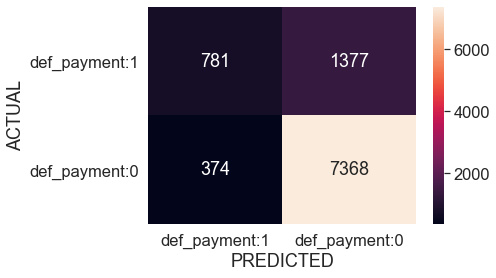


               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7742
           1       0.68      0.36      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.76      0.66      0.68      9900
weighted avg       0.81      0.82      0.80      9900



In [273]:
#Confusion matrix 
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["def_payment:1", "def_payment:0"] , 
                yticklabels = ["def_payment:1", "def_payment:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

### Building the Model with XGBoost

#### a- Hyperparameter Selection 

#### 1- Number of Estimators

In [34]:
modelxgb = XGBClassifier(objective='binary:logistic', seed=42)

param_grid = {'n_estimators' : [100,150,200]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_XG = GridSearchCV(modelxgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_XG.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_XG.best_score_, grid_XG.best_params_))
means = grid_XG.cv_results_['mean_test_score']
stds = grid_XG.cv_results_['std_test_score']
params = grid_XG.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_XG.score(X_train, y_train))
print('Test f1 score    :', grid_XG.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   43.5s finished


[13:38:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best CV score: 0.466124 using {'n_estimators': 100}

0.466124 (0.009003) with: {'n_estimators': 100}
0.464587 (0.006795) with: {'n_estimators': 150}
0.464094 (0.010875) with: {'n_estimators': 200}
Training f1 score: 0.7031988122553651
Test f1 score    : 0.46734397677793904


#### 2- Learning Rate 

In [35]:
modelxgb = XGBClassifier(objective='binary:logistic', seed=42, n_estimators=100)

param_grid = {'learning_rate': [0.1, 0.2, 0.3]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_XG = GridSearchCV(modelxgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_XG.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_XG.best_score_, grid_XG.best_params_))
means = grid_XG.cv_results_['mean_test_score']
stds = grid_XG.cv_results_['std_test_score']
params = grid_XG.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_XG.score(X_train, y_train))
print('Test f1 score    :', grid_XG.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   36.9s finished


[16:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best CV score: 0.473854 using {'learning_rate': 0.1}

0.473854 (0.012715) with: {'learning_rate': 0.1}
0.472321 (0.012584) with: {'learning_rate': 0.2}
0.466124 (0.009003) with: {'learning_rate': 0.3}
Training f1 score: 0.5725266903914591
Test f1 score    : 0.4782222222222222


#### 3- Maximum Depth 

In [36]:
modelxgb = XGBClassifier(objective='binary:logistic', seed=42, n_estimators=100, learning_rate=0.1)

param_grid = {'max_depth': [3,4,5,6]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_XG = GridSearchCV(modelxgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_XG.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_XG.best_score_, grid_XG.best_params_))
means = grid_XG.cv_results_['mean_test_score']
stds = grid_XG.cv_results_['std_test_score']
params = grid_XG.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_XG.score(X_train, y_train))
print('Test f1 score    :', grid_XG.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   26.6s finished


[16:02:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best CV score: 0.479222 using {'max_depth': 4}

0.478154 (0.010419) with: {'max_depth': 3}
0.479222 (0.003972) with: {'max_depth': 4}
0.476950 (0.007104) with: {'max_depth': 5}
0.473854 (0.012715) with: {'max_depth': 6}
Training f1 score: 0.5094421219547355
Test f1 score    : 0.4678292242934456


#### 4- Minimum Child Weight 

In [37]:
modelxgb = XGBClassifier(objective='binary:logistic', seed=42, n_estimators=100, learning_rate=0.1,max_depth=4)

param_grid = {'min_child_weight': [1,2,3]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_XG = GridSearchCV(modelxgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_XG.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_XG.best_score_, grid_XG.best_params_))
means = grid_XG.cv_results_['mean_test_score']
stds = grid_XG.cv_results_['std_test_score']
params = grid_XG.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Train f1 score:', grid_XG.score(X_train, y_train))
print('Test f1 score    :', grid_XG.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   19.6s finished


[16:03:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Best CV score: 0.480093 using {'min_child_weight': 2}

0.479222 (0.003972) with: {'min_child_weight': 1}
0.480093 (0.006105) with: {'min_child_weight': 2}
0.479005 (0.006267) with: {'min_child_weight': 3}
Train f1 score: 0.5083032490974729
Test f1 score    : 0.46938775510204084


#### b- Building the Model  

In [39]:
param_grid = {'classifier__max_depth'        : [4],
              'classifier__min_child_weight' : [2],
              'classifier__learning_rate'     : [0.1],
              'classifier__n_estimators'      : [100]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid = GridSearchCV(estimator = XGBClassifier(random_state = 42), param_grid = param_grid, cv = kfold, verbose = 1, 
                        n_jobs = -1,scoring="f1")
grid.fit(X_train, y_train)

print('Train f1 score:', grid.score(X_train, y_train))
print('Test f1 score    :', grid.score(X_test, y_test))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.2s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.3s finished


[16:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { classifier__learning_rate, classifier__max_depth, classifier__min_child_weight, classifier__n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train f1 score: 0.7031988122553651
Test f1 score    : 0.46734397677793904


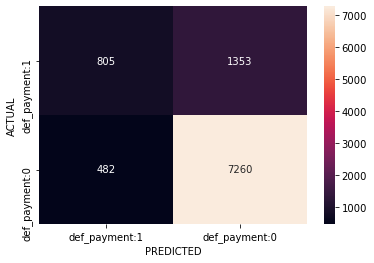


               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7742
           1       0.63      0.37      0.47      2158

    accuracy                           0.81      9900
   macro avg       0.73      0.66      0.68      9900
weighted avg       0.80      0.81      0.80      9900



In [40]:
#Confusion matrix 
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["def_payment:1", "def_payment:0"] , 
                yticklabels = ["def_payment:1", "def_payment:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

### Building the Model with Gradient Boosting

#### a- Hyperparameter Selection 

#### 1- Number of Estimators

In [275]:
modelgb = GradientBoostingClassifier(random_state=42)

param_grid = {'n_estimators': [100, 150,200,250]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_GBM = GridSearchCV(modelgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_GBM.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_GBM.score(X_train, y_train))
print('Test f1 score    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.8min finished



Best CV score: 0.481621 using {'n_estimators': 150}

0.479649 (0.010321) with: {'n_estimators': 100}
0.481621 (0.008042) with: {'n_estimators': 150}
0.476447 (0.008820) with: {'n_estimators': 200}
0.478199 (0.010368) with: {'n_estimators': 250}
Training f1 score: 0.5069404279930596
Test f1 score    : 0.4688622754491018


#### 2- Subsample 

In [279]:
modelgb = GradientBoostingClassifier(n_estimators=150, random_state=42)

param_grid = {'subsample': [0.5,0.6,0.7,0.8,0.9]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_GBM = GridSearchCV(modelgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_GBM.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_GBM.score(X_train, y_train))
print('Test f1 score    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.7min finished



Best CV score: 0.483329 using {'subsample': 0.8}

0.479684 (0.009774) with: {'subsample': 0.5}
0.482382 (0.007251) with: {'subsample': 0.6}
0.482504 (0.010904) with: {'subsample': 0.7}
0.483329 (0.010823) with: {'subsample': 0.8}
0.480419 (0.009050) with: {'subsample': 0.9}
Training f1 score: 0.5117941386704788
Test f1 score    : 0.47434367541766115


#### 3- Maximum Depth 

In [285]:
modelgb = GradientBoostingClassifier(n_estimators=150, random_state=42, subsample=0.8)

param_grid = {'max_depth': [3,4,5,6]}


kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_GBM = GridSearchCV(modelgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_GBM.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_GBM.score(X_train, y_train))
print('Test f1 score    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.8min finished



Best CV score: 0.484709 using {'max_depth': 4}

0.483329 (0.010823) with: {'max_depth': 3}
0.484709 (0.008322) with: {'max_depth': 4}
0.480022 (0.012542) with: {'max_depth': 5}
0.479866 (0.007141) with: {'max_depth': 6}
Training f1 score: 0.5397638355384835
Test f1 score    : 0.47463660634826454


#### 4- Minimum Sample Split

In [294]:
modelgb = GradientBoostingClassifier(n_estimators=150, random_state=42, subsample=0.8, max_depth=4)

param_grid = {'min_samples_split': [1,3,5,7,9]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_GBM = GridSearchCV(modelgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_GBM.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_GBM.score(X_train, y_train))
print('Test f1 score    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished



Best CV score: 0.485069 using {'min_samples_split': 3}

nan (nan) with: {'min_samples_split': 1}
0.485069 (0.008376) with: {'min_samples_split': 3}
0.484859 (0.012602) with: {'min_samples_split': 5}
0.480869 (0.013626) with: {'min_samples_split': 7}
0.482229 (0.011508) with: {'min_samples_split': 9}
Training f1 score: 0.5459974406369971
Test f1 score    : 0.47957371225577267


#### 5- Minimum Sample Leaf

In [295]:
modelgb = GradientBoostingClassifier(n_estimators=150, subsample=0.8, max_depth=4,
                                     min_samples_split= 3, random_state=42)

param_grid = {'min_samples_leaf': [1,2,3,4,5]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid_GBM = GridSearchCV(modelgb, param_grid, n_jobs=-1, cv=kfold,verbose=1, scoring="f1")

grid_GBM.fit(X_train, y_train)

print(); print("Best CV score: %f using %s\n" % (grid_GBM.best_score_, grid_GBM.best_params_))
means = grid_GBM.cv_results_['mean_test_score']
stds = grid_GBM.cv_results_['std_test_score']
params = grid_GBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('Training f1 score:', grid_GBM.score(X_train, y_train))
print('Test f1 score    :', grid_GBM.score(X_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.2min finished



Best CV score: 0.485286 using {'min_samples_leaf': 2}

0.485069 (0.008376) with: {'min_samples_leaf': 1}
0.485286 (0.011011) with: {'min_samples_leaf': 2}
0.483836 (0.011511) with: {'min_samples_leaf': 3}
0.483216 (0.007625) with: {'min_samples_leaf': 4}
0.481035 (0.007181) with: {'min_samples_leaf': 5}
Training f1 score: 0.5419446415897801
Test f1 score    : 0.4749183734045711


#### b- Building the Model  

In [296]:
param_grid = {
    'n_estimators'     : [150],
    'learning_rate'    : [0.08,0.09,0.1],
    'subsample'        : [0.8],
    'min_samples_split': [3],
    'min_samples_leaf' : [2],
    'max_depth'        : [4]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid  = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid = param_grid, cv = kfold, n_jobs = -1,verbose = 1, scoring='f1')

grid.fit(X_train, y_train)

print('Train f1 score:', grid.score(X_train, y_train))
print('Test f1 score :', grid.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.2min finished


Train f1 score: 0.5419446415897801
Test f1 score : 0.4749183734045711


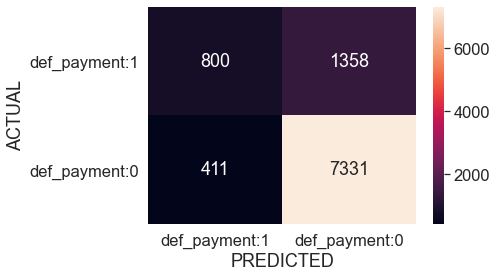


               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7742
           1       0.66      0.37      0.47      2158

    accuracy                           0.82      9900
   macro avg       0.75      0.66      0.68      9900
weighted avg       0.80      0.82      0.80      9900



In [297]:
#Confusion matrix 
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["def_payment:1", "def_payment:0"] , 
                yticklabels = ["def_payment:1", "def_payment:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

### Building the Model by Using SMOTE

***Due to the unbalanced dataset, I also build my models by using SMOTE to increase my score. I use this tecnique for Random Forest and Gradient Boosting.***

#### Random Forest with SMOTE

In [7]:
pipeline_smt = pipe_imb(steps=[('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=42)),
                             ('clf',   RandomForestClassifier(random_state=42))])

param_grid = {"clf__criterion"        : ['gini','entrophy'],
              "clf__min_samples_split": [2],
              "clf__max_features"     : [0.5],
              "clf__max_depth"        : [9],
              "clf__min_samples_leaf" : [5],
              "clf__n_estimators"     : [100],
              'sampler__sampling_strategy'  : [0.3, 0.4]}

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid = GridSearchCV(estimator = pipeline_smt, param_grid = param_grid, cv = kfold,verbose = 1,n_jobs = -1,scoring='f1')
grid.fit(X_train, y_train)

print('Train f1 score:', grid.score(X_train, y_train)) 
print('Test f1 score  :', grid.score(X_test, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.7s finished


Train f1 score: 0.5991142977646563
Test f1 score  : 0.5266594124047878


#### Gradient Boosting with SMOTE

In [8]:
pipeline_gbm = pipe_imb(steps=[('sampler', SMOTEENN(enn=EditedNearestNeighbours(), random_state=42)),
                                ('classifier',   GradientBoostingClassifier(random_state=42))])

param_grid = {'classifier__n_estimators'    : [150],
             'classifier__learning_rate'    : [0.1],
             'classifier__subsample'        : [0.8],
             'classifier__min_samples_split': [3],
             'classifier__min_samples_leaf' : [2],
             'classifier__max_depth'        : [4],
             'sampler__sampling_strategy': [0.2, 0.3]} 

kfold = StratifiedKFold(n_splits = 5, random_state = 42) 
grid = GridSearchCV(pipeline_gbm, param_grid = param_grid, cv = kfold, verbose = 1, n_jobs = -1,scoring="f1")
grid.fit(X_train, y_train)

print('Train f1 score:', grid.score(X_train, y_train))
print('Test f1 score:',  grid.score(X_test, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   15.1s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   15.7s finished


Train f1 score: 0.5901207018967441
Test f1 score: 0.529192546583851


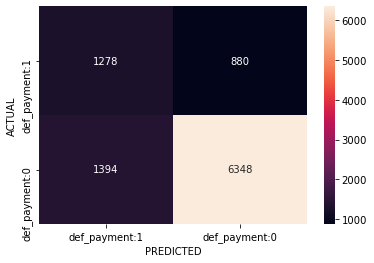


               precision    recall  f1-score   support

           0       0.88      0.82      0.85      7742
           1       0.48      0.59      0.53      2158

    accuracy                           0.77      9900
   macro avg       0.68      0.71      0.69      9900
weighted avg       0.79      0.77      0.78      9900



In [9]:
#Confusion matrix 
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted, [1,0])
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["def_payment:1", "def_payment:0"] , 
                yticklabels = ["def_payment:1", "def_payment:0"] )
    plt.ylabel('ACTUAL')
    plt.xlabel('PREDICTED')
    plt.show()
draw_cm( y_test, grid.predict(X_test) )
print('\n',classification_report(y_test, grid.predict(X_test)))

### Model Selection 

***I build four models and you can see their results as below:*** 

Logistic Regression (with hyperparameters): Test f1 score is 0.35.

Random Forest (with hyperparameter tuning): Train f1 score is 0.56 and test f1 score is 0.4714. Also, I build Random Forest with SMOTE and my train f1 score becomes 0.59 and test f1 score becomes 0.5266.  

XGBoost (with hyperparameter tuning): Train f1 score is 0.70 and test f1 score is 0.46. 

Gradient Boosting (with hyperparameter tuning): Train f1 score is 0.54 and test f1 score is 0.4749. Moreover, I build Gradient Boosting with SMOTE and my train f1 score becomes 0.59 and test f1 score is 0.5291. 

***As a result of the test f1 score, gradient boosting with SMOTE gives the highest f1 score. Thus, my model is gradient boosting (by using SMOTE).***